In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.fft import fft, ifft
from scipy.interpolate import griddata
from scipy.interpolate import interp1d

<ipython-input-2-6468b5ecfcc0>:73: RuntimeWarning: divide by zero encountered in divide
  f_original=1/np.array(t)
<ipython-input-2-6468b5ecfcc0>:74: RuntimeWarning: divide by zero encountered in divide
  f_samp=1/np.array(t_interp)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


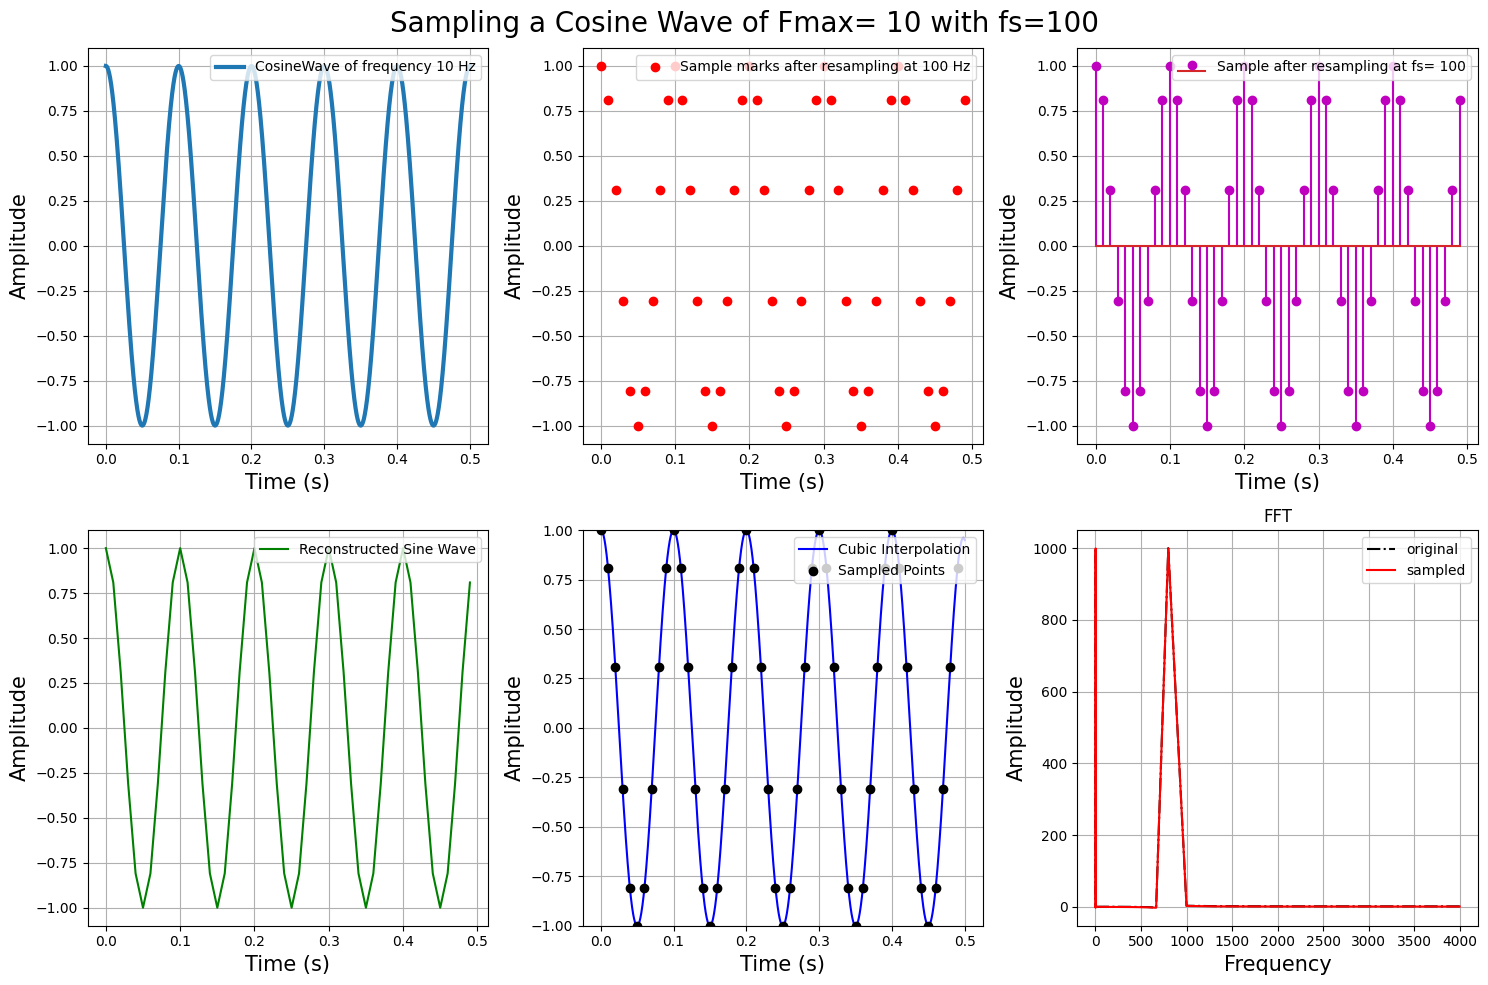

In [2]:
# Frequency of the sine wave
f = 10  # Hz

# Time array for continuous cosine wave (before sampling)
t = np.linspace(0, 0.5, 2000)
x1 = np.cos(2 * np.pi * f * t)

# Sampling rate (fs) is greater than the Nyquist rate (Fs > 2Fmax)
s_rate = 100 # Hz
T = 1 / s_rate  # Sampling period
n = np.arange(0, 0.5 / T)  # Sample indices
nT = n * T  # Sampling time points


# Sampled sine wave (discrete)
x2 = np.cos(2 * np.pi * f * nT)

# Plot the figures
plt.figure(figsize=(15, 10))
plt.suptitle(f"Sampling a Cosine Wave of Fmax= {f} with fs={s_rate}", fontsize=20)

# Plot the continuous sine wave
plt.subplot(2, 3, 1)
plt.plot(t, x1, linewidth=3, label=f'CosineWave of frequency {f} Hz')
plt.xlabel('Time (s)', fontsize=15)
plt.ylabel('Amplitude', fontsize=15)
plt.legend(fontsize=10, loc='upper right')
plt.grid()

# Plot the sampled points
plt.subplot(2, 3, 2)
plt.plot(nT, x2, 'ro', label=f'Sample marks after resampling at {s_rate} Hz')
plt.xlabel('Time (s)', fontsize=15)
plt.ylabel('Amplitude', fontsize=15)
plt.legend(fontsize=10, loc='upper right')
plt.grid()
# Plot the stem plot of the samples
plt.subplot(2,3, 3)
plt.stem(nT, x2, 'm', label=f'Sample after resampling at fs= {s_rate}')
plt.xlabel('Time (s)', fontsize=15)
plt.ylabel('Amplitude', fontsize=15)
plt.legend(fontsize=10, loc='upper right')
plt.grid()
# Reconstructed sine wave (from samples)
plt.subplot(2, 3, 4)
plt.plot(nT, x2, 'g-', label='Reconstructed Sine Wave')
plt.xlabel('Time (s)', fontsize=15)
plt.ylabel('Amplitude', fontsize=15)
plt.legend(fontsize=10, loc='upper right')
plt.grid()
###################################################
# Cubic Interpolation
cubic_interp = interp1d(nT, x2, kind='cubic', fill_value="extrapolate")

# Generate new time points for interpolation
t_interp = np.linspace(0, 0.5, 2000)

# Reconstructed signals using interpolation
x2_cubic = cubic_interp(t_interp)
# Plot the cubic interpolation result
plt.subplot(2, 3, 5)
plt.plot(t_interp, x2_cubic, 'b-', label='Cubic Interpolation')
plt.scatter(nT, x2, color='black', zorder=5, label='Sampled Points')
plt.xlabel('Time (s)', fontsize=15)
plt.ylabel('Amplitude', fontsize=15)
plt.legend(fontsize=10, loc="upper right")
plt.ylim(-1,+1)
plt.grid()
#Compute FFT of the original signal and the reconstructed signal (Left as an exercise)
plt.subplot(2, 3, 6)
original_signal = fft(x1)
sampled_signal = fft(x2_cubic)
f_original=1/np.array(t)
f_samp=1/np.array(t_interp)
#plt.xlim(0,30)
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Amplitude', fontsize=15)
plt.plot(f_original,original_signal,"-.",color="black",label="original")
plt.plot(f_samp,sampled_signal,color="red",label="sampled")
plt.title("FFT")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving downsampled_tut1.csv to downsampled_tut1.csv


      longitude  latitude  elevation
0       88.0083   15.9965    -2683.0
1       89.6750   15.9965    -2558.0
2       91.3417   15.9965    -2438.0
3       93.0083   15.9965    -2595.0
4       94.6750   15.9965        5.0
...         ...       ...        ...
7652    90.1250   -5.0019    -5007.0
7653    91.7917   -5.0019    -4965.0
7654    93.4583   -5.0019    -5043.0
7655    95.1250   -5.0019    -5011.0
7656    96.7917   -5.0019    -5319.0

[7657 rows x 3 columns]


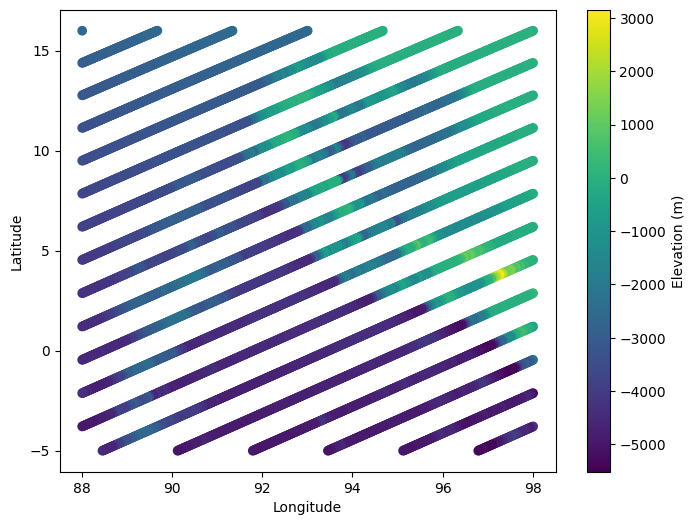

In [ ]:
df = pd.read_csv('downsampled_tut1.csv')
print(df)
plt.figure(figsize=(8, 6))
plt.scatter(df['longitude'],df['latitude'],c=df['elevation'])
plt.colorbar(label='Elevation (m)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

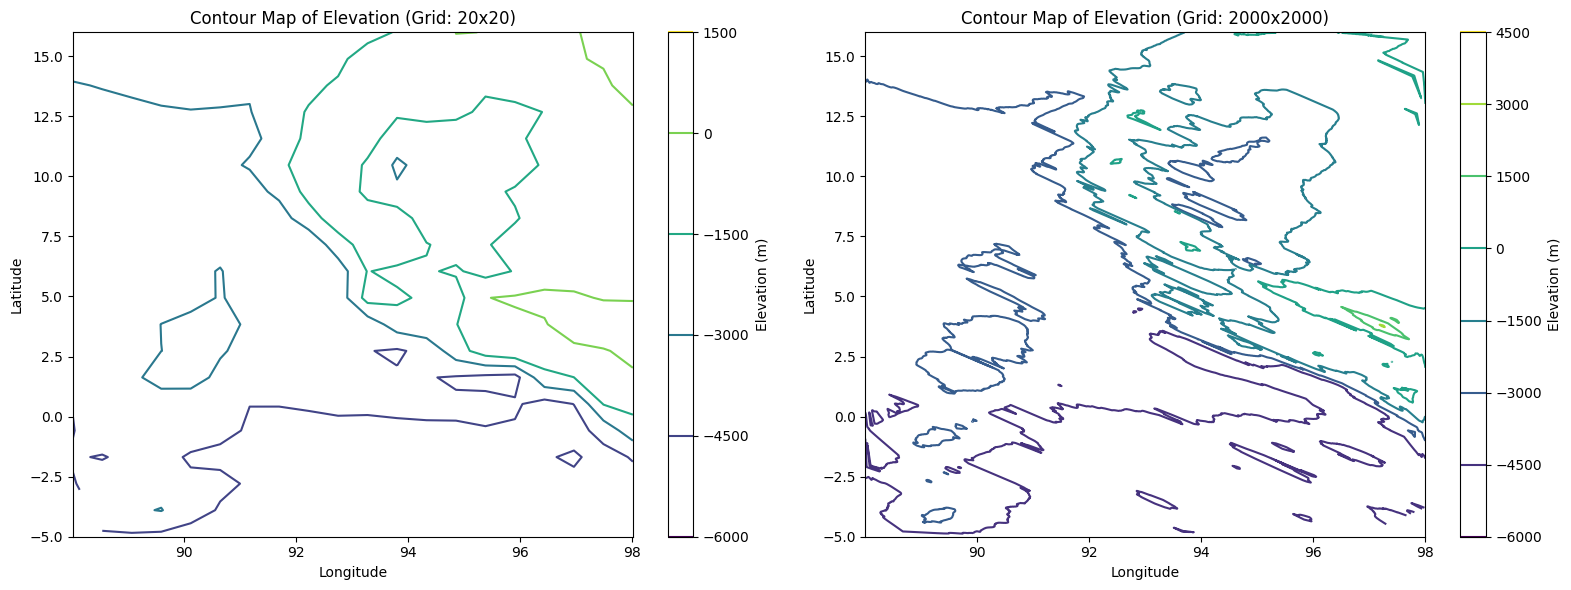

In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # Create a figure with 1 row and 2 columns
for idx, i in enumerate([20, 2000]):
    xi = np.linspace(df['longitude'].min(), df['longitude'].max(), i)
    yi = np.linspace(df['latitude'].min(), df['latitude'].max(), i)
    xi, yi = np.meshgrid(xi, yi)

    # Interpolate elevation data onto the grid using 'linear' method
    zi_linear = griddata(
        (df['longitude'], df['latitude']), df['elevation'], (xi, yi), method='linear')

    # Plot the grid map using pcolormesh
    ax = axes[idx]
    contour = ax.contour(xi, yi, zi_linear, levels=5, cmap='viridis')
    fig.colorbar(contour, ax=ax, label='Elevation (m)')
    ax.set_title(f'Contour Map of Elevation (Grid: {i}x{i})')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


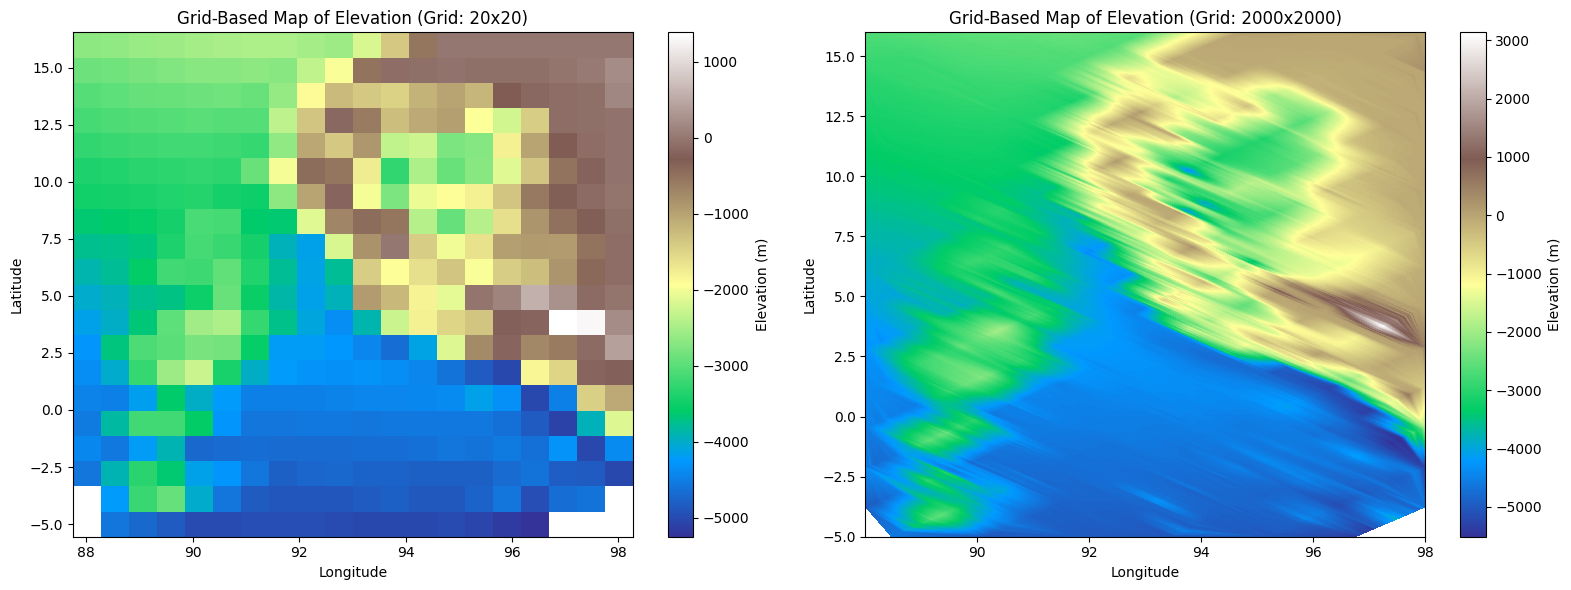

In [ ]:
# Assuming `df` is a DataFrame with 'longitude', 'latitude', and 'elevation' columns

# Create a grid
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # Create a figure with 1 row and 2 columns

for idx, i in enumerate([20, 2000]):
    xi = np.linspace(df['longitude'].min(), df['longitude'].max(), i)
    yi = np.linspace(df['latitude'].min(), df['latitude'].max(), i)
    xi, yi = np.meshgrid(xi, yi)

    # Interpolate elevation data onto the grid using 'linear' method
    zi_linear = griddata(
        (df['longitude'], df['latitude']), df['elevation'], (xi, yi), method='linear')

    # Plot the grid map using pcolormesh
    ax = axes[idx]  # Select the subplot
    pcm = ax.pcolormesh(xi, yi, zi_linear, cmap='terrain', shading='auto')
    fig.colorbar(pcm, ax=ax, label='Elevation (m)')
    ax.set_title(f'Grid-Based Map of Elevation (Grid: {i}x{i})')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

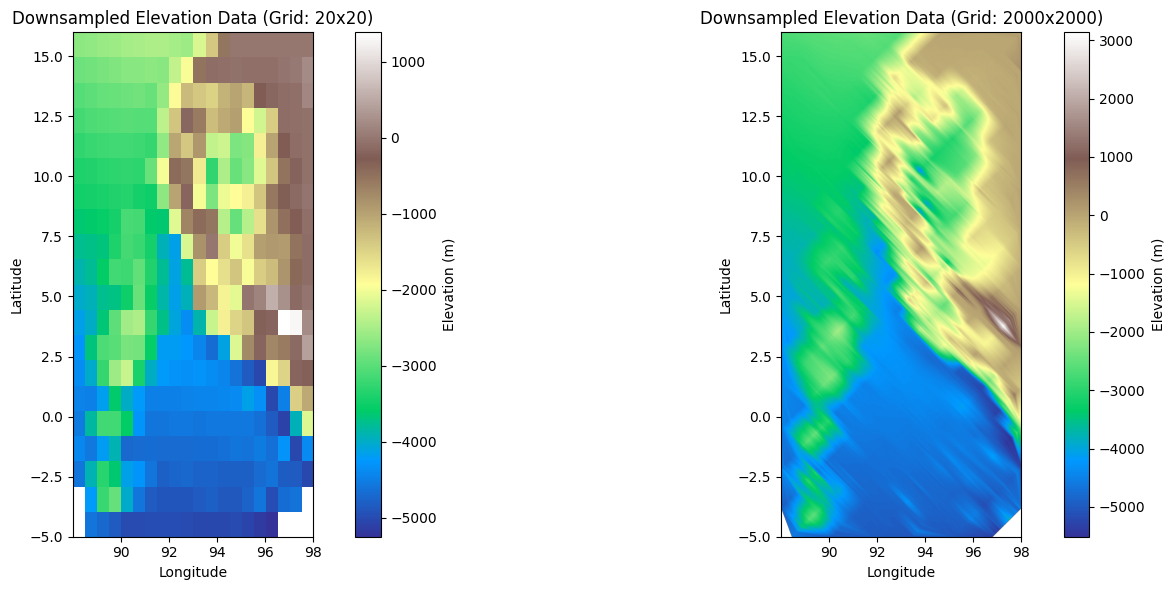

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # Create a figure with 1 row and 2 columns

for idx, i in enumerate([20, 2000]):
    xi = np.linspace(df['longitude'].min(), df['longitude'].max(), i)
    yi = np.linspace(df['latitude'].min(), df['latitude'].max(), i)
    xi, yi = np.meshgrid(xi, yi)

    # Interpolate elevation data onto the grid using 'linear' method
    zi_linear = griddata(
        (df['longitude'], df['latitude']), df['elevation'], (xi, yi), method='linear')

    # Plot the grid map
    ax = axes[idx]  # Select the subplot
    im = ax.imshow(zi_linear, extent=(df['longitude'].min(), df['longitude'].max(),
                                      df['latitude'].min(), df['latitude'].max()),
                   origin='lower', cmap='terrain')
    fig.colorbar(im, ax=ax, label='Elevation (m)')
    ax.set_title(f'Downsampled Elevation Data (Grid: {i}x{i})')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


,Longitude,Latitude,Elevation
0,-2.509198,-2.127290,-14.746238
1,9.014286,-0.531287,38.466866
2,4.639879,7.090948,81.382180
3,1.973170,-3.199912,-57.922198
4,-6.879627,7.392994,-62.412828


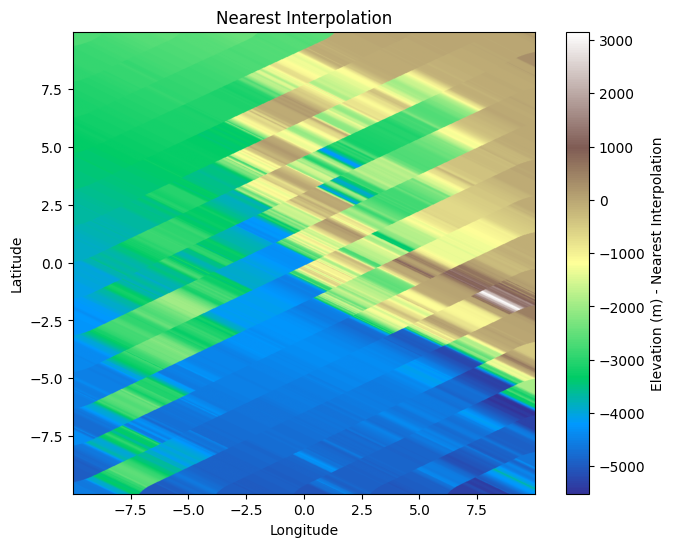

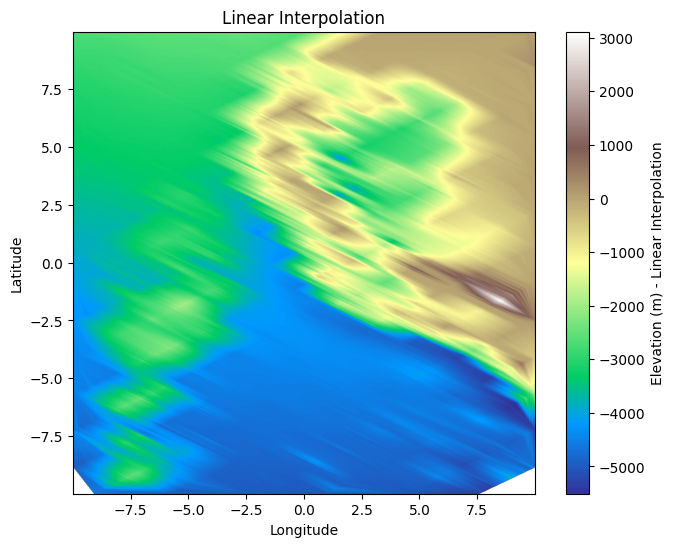

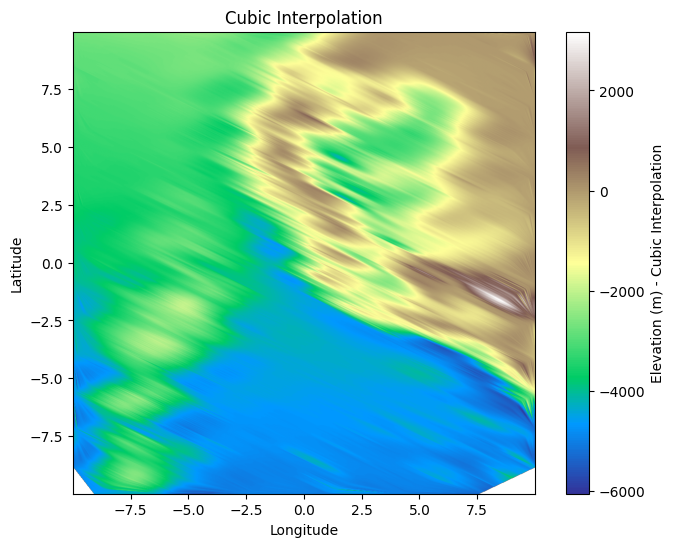

In [ ]:
methods = ['nearest', 'linear', 'cubic']
xi = np.linspace(df['longitude'].min(), df['longitude'].max(), 1000)
yi = np.linspace(df['latitude'].min(), df['latitude'].max(),1000)
xi, yi = np.meshgrid(xi, yi)
for method in methods:
    zi = griddata((df['longitude'], df['latitude']), df['elevation'], (xi, yi), method=method)
    plt.figure(figsize=(8, 6))
    plt.imshow(zi, extent=(xi.min(), xi.max(), yi.min(), yi.max()), origin='lower', cmap='terrain')
    plt.colorbar(label=f'Elevation (m) - {method.capitalize()} Interpolation')
    plt.title(f'{method.capitalize()} Interpolation')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()
